In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [2]:
import joblib
import numpy as np 
import pandas as pd
# import seaborn as sns
from joblib import dump
# import matplotlib.pyplot as plt

### Function to Scale Data

In [3]:
def scale_data(columns_to_scale):
    scaler = MinMaxScaler()
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    print('Data Scaled using MinMaxScaler Successfull..🫡')
    return scaler

### Function for Training Models

In [4]:
def train_model(model_name):
    if model_name == 'LogisticRegression':
        model = LogisticRegression(solver='lbfgs', max_iter=1000)
    elif model_name == 'DecisionTree':
        model = DecisionTreeClassifier()
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()
    else:
        print("Provide Model Name Please.")
        
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'{model_name} Results: \n\n')
    print(f'Score: {model.score(x_test, y_test)}\n')
    print(f'Confusion Matrix: \n\n {confusion_matrix(y_test, pred)}\n')
    print(f'Classification Report: \n\n {classification_report(y_test, pred)}\n')
    # fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
    # sns.lineplot(x=fpr1, y=tpr1, color='orange', linestyle='--')
    # plt.title("ROC Curve")
    # plt.xlabel('False Positve Rate')
    # plt.ylabel('True Positve Rate')
    
    return model

### Function for Saving Models

In [84]:
def save_model(model_name):
    joblib.dump(model_name, f'{model_name}.joblib')

## Preprocessing

In [5]:
df = pd.read_csv('heart_data.csv')
pd.set_option('display.max_columns', 30)

In [6]:
print(f"Shape of Data: {df.shape}")
print(f"Null Values in our Dataset: {df.isnull().sum().sum()}")

Shape of Data: (253680, 22)
Null Values in our Dataset: 0


In [7]:
df.columns

Index(['heartDiseaseorAttack', 'highBP', 'highChol', 'cholCheck', 'bmi',
       'smoker', 'stroke', 'diabetes', 'physActivity', 'fruits', 'veggies',
       'hvyAlcoholConsump', 'anyHealthcare', 'noDocbcCost', 'genHlth',
       'mentHlth', 'physHlth', 'diffWalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

### Scale Data

In [8]:
scaler = scale_data(['bmi', 'diabetes', 'genHlth', 'mentHlth', 'physHlth', 'age', 'education', 'income'])
joblib.dump(scaler, 'scaler.joblib')

Data Scaled using MinMaxScaler Successfull..🫡


['scaler.joblib']

### Spliting dataset

In [9]:
y = df[['heartDiseaseorAttack']]
x = df.drop(['heartDiseaseorAttack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values.ravel(), test_size=0.2)

### LogisticRegression

LogisticRegression Results: 


Score: 0.9070285398927783

Confusion Matrix: 

 [[45421   510]
 [ 4207   598]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.99      0.95     45931
           1       0.54      0.12      0.20      4805

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736




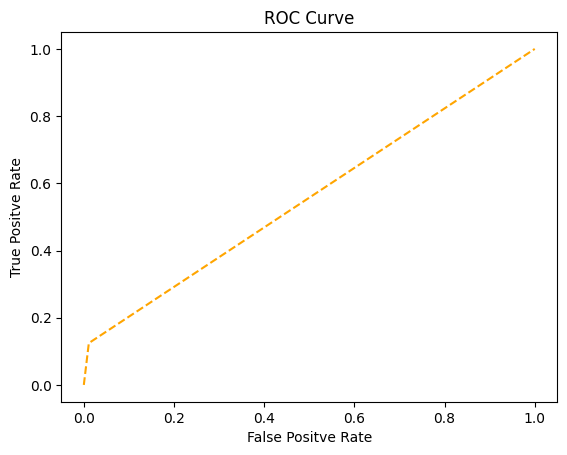

In [92]:
lr_model = train_model('LogisticRegression')

### Decision tree

In [11]:
joblib.dump(dt_model, 'model.joblib')

['model.joblib']

In [10]:
dt_model = train_model('DecisionTree')

DecisionTree Results: 


Score: 0.8508948281299274

Confusion Matrix: 

 [[41867  4143]
 [ 3422  1304]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.91      0.92     46010
           1       0.24      0.28      0.26      4726

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.86      0.85      0.86     50736




### Random Forest

RandomForest Results: 


Score: 0.9008002207505519

Confusion Matrix: 

 [[45190   741]
 [ 4292   513]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.98      0.95     45931
           1       0.41      0.11      0.17      4805

    accuracy                           0.90     50736
   macro avg       0.66      0.55      0.56     50736
weighted avg       0.87      0.90      0.87     50736




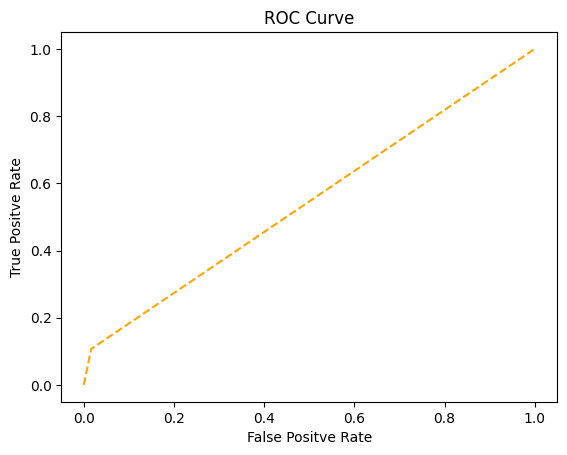

In [94]:
rf_model = train_model('RandomForest')
save_model(rf_model)

## Selected Model

* As understanding feature importance and their impact is crucial, Random Forest could be more suitable.
* Random Forest is more robust due to its ability to capture complex relationships.

### Testing Models

In [96]:
scaler = joblib.load('MinMaxScaler.joblib')

In [97]:
data = { "bmi": 26.5, "diabetes": 1, "genHlth": 4, "mentHlth": 10, "physHlth": 8, "age": 30, "education": 3, "income": 6 }

In [98]:
df = pd.DataFrame().from_dict([data])

In [99]:
df

,bmi,diabetes,genHlth,mentHlth,physHlth,age,education,income
0,26.5,1,4,10,8,30,3,6


In [100]:
df1 = scaler.transform(df)

In [101]:
df1

array([[0.16860465, 0.5       , 0.75      , 0.33333333, 0.26666667,
        2.41666667, 0.4       , 0.71428571]])